# 🚨 Berlin Crime Statistics - Exploratory Data Analysis

**Objective:** Analyze Berlin crime patterns (2015-2024) to understand safety trends across districts and neighborhoods.

**Dataset:** 28,390 crime records from SQLite database

**Key Questions:**
- Which districts have highest/lowest crime rates?
- How have crime trends changed over time?
- Which neighborhoods are safest/riskiest?
- What crime types are most common?
- Are there seasonal patterns?

## 📚 Setup: Import Libraries

In [9]:
# Data manipulation
import pandas as pd
import numpy as np

# Database
import sqlite3

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 🗄️ Load Data from Database

In [10]:
# Connect to database
DB_PATH = "../database/berlin_intelligence.db"
conn = sqlite3.connect(DB_PATH)

# Load crime statistics
query = "SELECT * FROM crime_statistics"
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

print(f"✅ Loaded {len(df):,} crime records")
print(f"✅ Date range: {df['year'].min()} - {df['year'].max()}")
print(f"✅ Districts: {df['district'].nunique()}")
print(f"✅ Neighborhoods: {df['neighborhood'].nunique()}")

✅ Loaded 28,390 crime records
✅ Date range: 2015 - 2024
✅ Districts: 12
✅ Neighborhoods: 166


## 🔍 Data Overview

In [11]:
# Display first few records
df.head()

,area_id,neighborhood,district,district_id,year,crime_type_german,crime_type_english,category,total_number_cases,frequency_100k,population_base,severity_weight
0,13007.0,Osloer Straße,Mitte,01,2015,Brand- stiftung,Arson,Property Crime,13.0,34.0,None,4.5
1,13008.0,Brunnenstraße Nord,Mitte,01,2015,Brand- stiftung,Arson,Property Crime,10.0,27.0,None,4.5
2,14009.0,Parkviertel,Mitte,01,2015,Brand- stiftung,Arson,Property Crime,16.0,36.0,None,4.5
3,14010.0,Wedding Zentrum,Mitte,01,2015,Brand- stiftung,Arson,Property Crime,14.0,25.0,None,4.5
4,19900.0,"Bezirk (Mi), nicht zuzuordnen",Mitte,01,2015,Brand- stiftung,Arson,Property Crime,8.0,NaN,None,4.5


In [12]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28390 entries, 0 to 28389
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_id             28390 non-null  float64
 1   neighborhood        28390 non-null  object 
 2   district            28390 non-null  object 
 3   district_id         28390 non-null  object 
 4   year                28390 non-null  int64  
 5   crime_type_german   28390 non-null  object 
 6   crime_type_english  28390 non-null  object 
 7   category            28390 non-null  object 
 8   total_number_cases  28390 non-null  float64
 9   frequency_100k      26350 non-null  float64
 10  population_base     0 non-null      object 
 11  severity_weight     28390 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.6+ MB


In [13]:
# Statistical summary
df.describe()

,area_id,year,total_number_cases,frequency_100k,severity_weight
count,28390.000000,28390.000000,28390.000000,26350.000000,28390.000000
mean,70723.329341,2019.500000,718.581050,1513.102509,2.852941
std,33906.751933,2.872332,3312.614649,3656.016432,1.185282
min,10000.000000,2015.000000,0.000000,0.000000,1.000000
25%,41001.000000,2017.000000,23.000000,104.000000,2.000000
50%,74009.000000,2019.500000,82.000000,316.000000,3.000000
75%,95020.000000,2022.000000,338.000000,1113.000000,4.000000
max,129900.000000,2024.000000,106006.000000,114281.000000,4.500000


In [14]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

Missing values per column:
frequency_100k      2040
population_base    28390
dtype: int64


## 📊 Crime by District Analysis

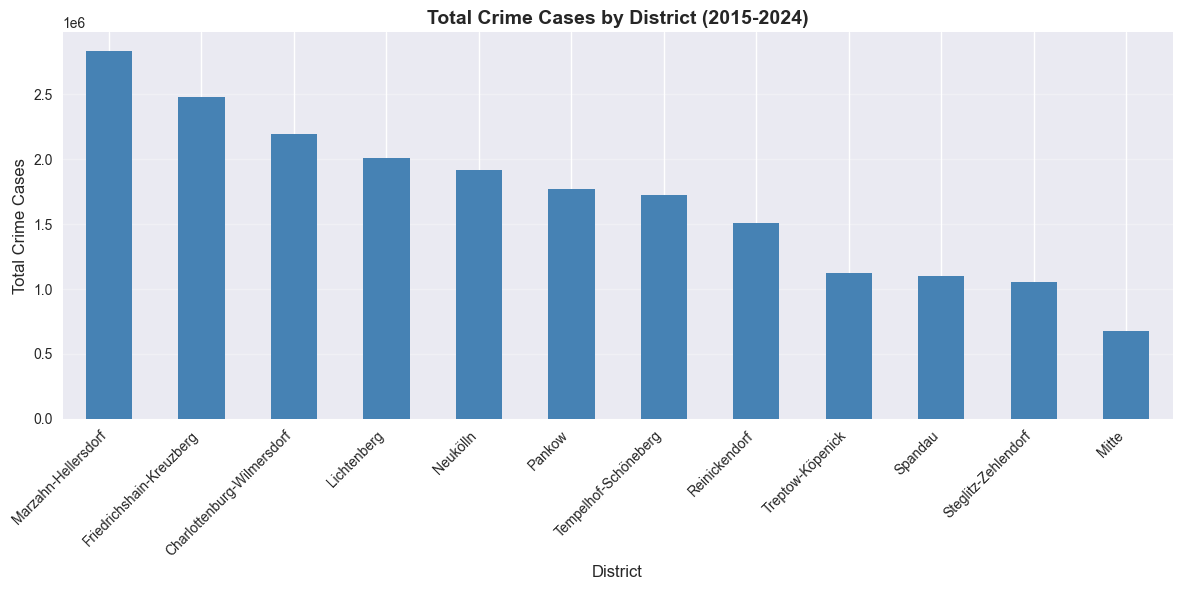


Top 5 Districts by Crime:
district
Marzahn-Hellersdorf           2836015.0
Friedrichshain-Kreuzberg      2480180.0
Charlottenburg-Wilmersdorf    2197158.0
Lichtenberg                   2007549.0
Neukölln                      1915428.0
Name: total_number_cases, dtype: float64


In [15]:
# Total crimes by district
district_crimes = df.groupby('district')['total_number_cases'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
district_crimes.plot(kind='bar', color='steelblue')
plt.title('Total Crime Cases by District (2015-2024)', fontsize=14, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Crime Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Districts by Crime:")
print(district_crimes.head())

## 📈 Crime Trends Over Time

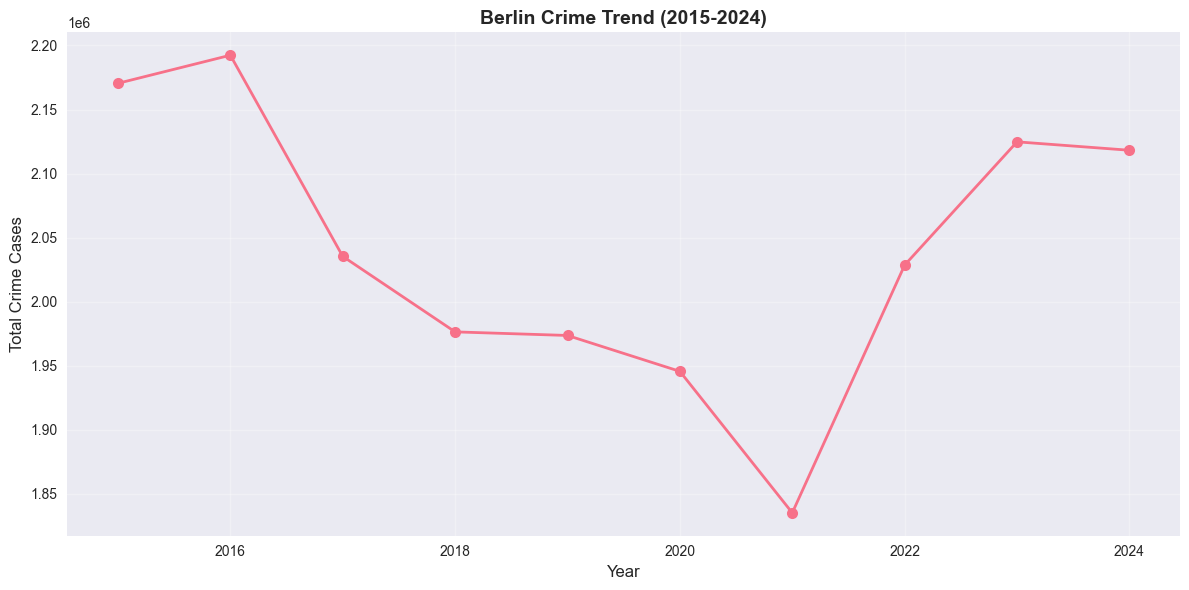


Yearly Crime Statistics:
year
2015    2170464.0
2016    2192400.0
2017    2035360.0
2018    1976412.0
2019    1973614.0
2020    1945586.0
2021    1835136.0
2022    2028562.0
2023    2124778.0
2024    2118204.0
Name: total_number_cases, dtype: float64


In [16]:
# Crime trends by year
yearly_crimes = df.groupby('year')['total_number_cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(yearly_crimes.index, yearly_crimes.values, marker='o', linewidth=2, markersize=8)
plt.title('Berlin Crime Trend (2015-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crime Cases', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nYearly Crime Statistics:")
print(yearly_crimes)

## 🏘️ Top 10 Safest vs Riskiest Neighborhoods

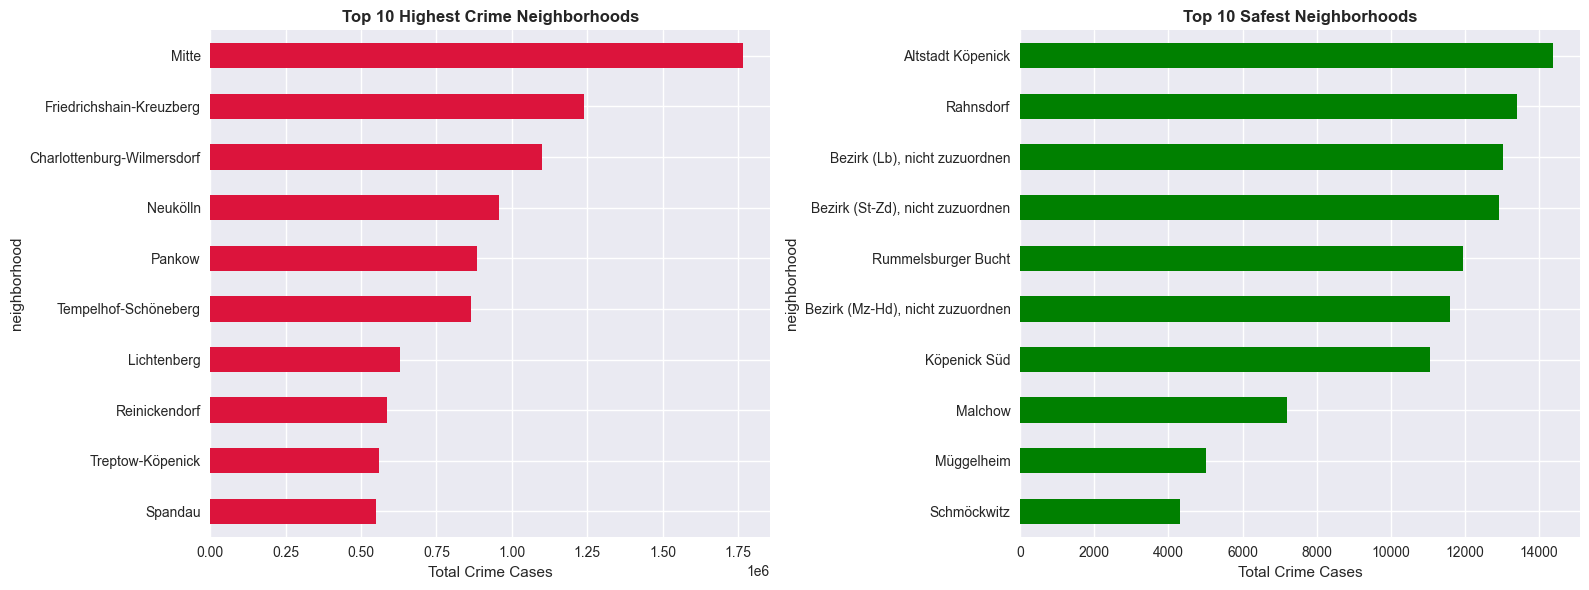

In [17]:
# Crime by neighborhood
neighborhood_crimes = df.groupby('neighborhood')['total_number_cases'].sum().sort_values(ascending=False)

# Top 10 riskiest
top_10_risky = neighborhood_crimes.head(10)

# Top 10 safest (excluding zero/very low crime)
top_10_safe = neighborhood_crimes[neighborhood_crimes > 0].tail(10)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Riskiest neighborhoods
top_10_risky.plot(kind='barh', ax=ax1, color='crimson')
ax1.set_title('Top 10 Highest Crime Neighborhoods', fontsize=12, fontweight='bold')
ax1.set_xlabel('Total Crime Cases')
ax1.invert_yaxis()

# Safest neighborhoods  
top_10_safe.plot(kind='barh', ax=ax2, color='green')
ax2.set_title('Top 10 Safest Neighborhoods', fontsize=12, fontweight='bold')
ax2.set_xlabel('Total Crime Cases')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## 🔪 Crime Type Analysis

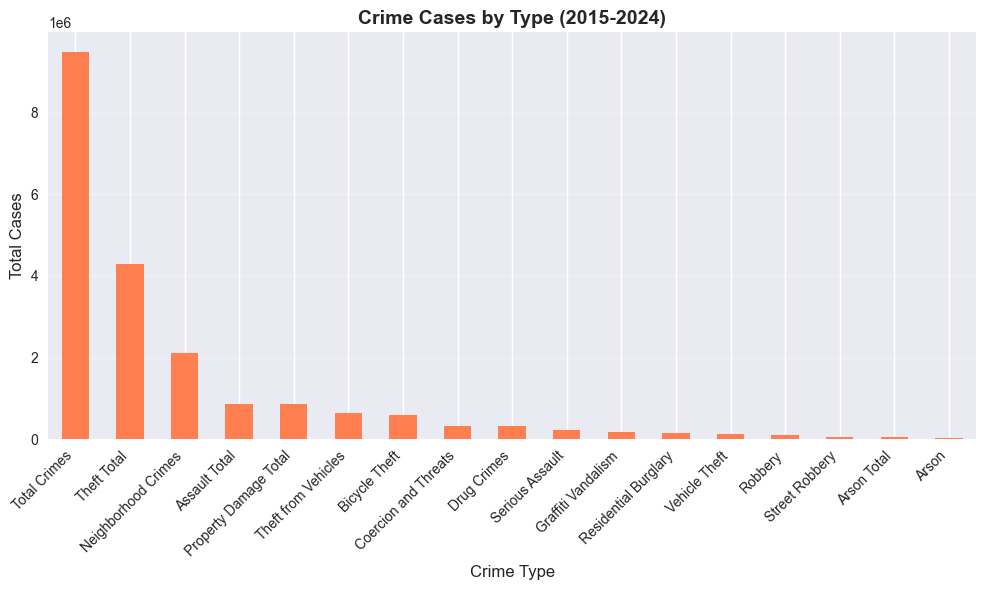


Crime Distribution by Type:
crime_type_english
Total Crimes             9490222.0
Theft Total              4285742.0
Neighborhood Crimes      2100082.0
Assault Total             864116.0
Property Damage Total     859084.0
Theft from Vehicles       645754.0
Bicycle Theft             581686.0
Coercion and Threats      331816.0
Drug Crimes               330408.0
Serious Assault           221118.0
Graffiti Vandalism        180230.0
Residential Burglary      164848.0
Vehicle Theft             122946.0
Robbery                    93288.0
Street Robbery             55494.0
Arson Total                53672.0
Arson                      20010.0
Name: total_number_cases, dtype: float64


In [18]:
# Crime by type
crime_type_totals = df.groupby('crime_type_english')['total_number_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
crime_type_totals.plot(kind='bar', color='coral')
plt.title('Crime Cases by Type (2015-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCrime Distribution by Type:")
print(crime_type_totals)

## 📊 Summary Statistics

In [19]:
print("=" * 60)
print("BERLIN CRIME STATISTICS SUMMARY (2015-2024)")
print("=" * 60)
print(f"\nTotal Crime Records: {len(df):,}")
print(f"Total Crime Cases: {df['total_number_cases'].sum():,.0f}")
print(f"\nDistricts Analyzed: {df['district'].nunique()}")
print(f"Neighborhoods Analyzed: {df['neighborhood'].nunique()}")
print(f"\nMost Dangerous District: {district_crimes.index[0]} ({district_crimes.iloc[0]:,.0f} cases)")
print(f"Safest District: {district_crimes.index[-1]} ({district_crimes.iloc[-1]:,.0f} cases)")
print(f"\nMost Common Crime: {crime_type_totals.index[0]} ({crime_type_totals.iloc[0]:,.0f} cases)")
print(f"Least Common Crime: {crime_type_totals.index[-1]} ({crime_type_totals.iloc[-1]:,.0f} cases)")
print("\n" + "=" * 60)

BERLIN CRIME STATISTICS SUMMARY (2015-2024)

Total Crime Records: 28,390
Total Crime Cases: 20,400,516

Districts Analyzed: 12
Neighborhoods Analyzed: 166

Most Dangerous District: Marzahn-Hellersdorf (2,836,015 cases)
Safest District: Mitte (675,886 cases)

Most Common Crime: Total Crimes (9,490,222 cases)
Least Common Crime: Arson (20,010 cases)



## 🎯 Key Findings & Next Steps

**Initial Observations:**
- [To be filled after running analysis]

**Next Analysis:**
- Cross-dataset analysis with property prices
- Safety scoring model for neighborhoods
- Predictive models for crime trends